# MATH 210 Project 2: Women Astronauts in NASA

### By Agnes Ouko


From the movie [*Hidden Figures* ](https://www.rottentomatoes.com/m/hidden_figures/), we clearly see what an important role women played in serving as the brains behind one of the greatest operations in history: the launch of astronaut John Glenn into orbit, a stunning achievement that restored the nation's confidence, turned around the Space Race, and galvanized the world. But despite women being at the top of their game, they are still not as appreciated as their male counterparts and most of them have had to work twice as hard to  get to where their male counterparts are. 

We will study the number of Women Astronauts in Nasa using [List of NASA astronauts](https://www.nasa.gov/centers/johnson/pdf/740566main_current.pdf) from Nasa's [Open Data Portal](https://data.nasa.gov/).

Although there are very many important jobs like engineering, mathematics, Nutrition specialists, accounting and many others in Nasa occupied by women, **the entire analysis is only going to focus on astronauts**.

The questions we address are:

   1. Who was the first woman astronaut?
   2. How many women astronauts in total have been part of the Nasa groups?
   3. How many women (in total and as a percentage) were part of the main space exploration programs?
   4. What is the current trend? Are more women hired as astronauts by Nasa and at what rate?
   5. When will Nasa achieve gender balance in terms of women astronauts on space missions?



## Executive summary

1. In 1978, six women were selected to join NASA Group 8. There was no woman selected to join the first seven groups.
2. Sally Ride became the first American woman to travel to space in 1983 even though she worked for NASA since 1978.
3. The percentage of women selected for NASA missions reached 50% in 2013 when the 21st group was created. It seems like there is a gender balance, but unfortunately we cannot rely on these statistics for sure since the number of people selected per group varies greatly.



### Table of Contents

1. Introducing the data
2. Women astronauts in NASA
    * The first Woman astronaut in NASA
    * The Number of women astronauts sent to space 1978-2009
    * Measuring the increase rate of women in NASA 1978-2013
    * Projecting gender balance in NASA Astronaut Selections

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)

## 1. Introducing the data

The [List of NASA astronauts](https://www.nasa.gov/centers/johnson/pdf/740566main_current.pdf) dataset which is available in the [NASA's Open Data Portal](https://data.nasa.gov/) is a summary of every astronaut who has gone to space during the period 1958 to 2009. Some of the recent astronauts who have gone to space are not in this list, but we will append this data later on. The data is fairly straightforward since most of the names are English names therefore we do not need to specify the encoding option to `latin`.



In [2]:
astronauts = pd.read_csv('NASA astronauts.csv')

In [3]:
astronauts.head()

,Astronaut,Selection Year,Group,# Flights,Status,Military or civilian,Gender,If military include details,Date of birth,Job,Missions flown,Cumulative hours of space flight time
0,"Carpenter, M. Scott",1959,1,1,Former,Military,Male,"Commander, US Navy (Retired)",5/1/1925,NaN,Mercury 7,4
1,"Williams, Clifton C., Jr.",1963,3,0,Deceased,Military,Male,"Major, US Marine Corps",9/26/1932,NaN,NaN,0
2,"Worden, Alfred M.",1966,5,1,Former,Military,Male,"Colonel, US Air Force",2/7/1932,NaN,Apollo 15,295
3,"Williams, Donald E.",1978,8,2,Former,Military,Male,"Captain, US Navy",2/13/1942,NaN,STS 51-D and STS-34,287
4,"Wilcutt, Terrence W.",1990,13,4,Current,Military,Male,"Colonel, US Marine Corps (Retired)",10/31/1949,Pilot,"STS-68, STS-79, STS-89 and STS-106",1007


In [4]:
astronauts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 12 columns):
Astronaut                                335 non-null object
Selection Year                           335 non-null int64
Group                                    335 non-null int64
# Flights                                335 non-null object
Status                                   335 non-null object
Military or civilian                     333 non-null object
Gender                                   335 non-null object
If military include details              209 non-null object
Date of birth                            335 non-null object
Job                                      116 non-null object
Missions flown                           300 non-null object
Cumulative hours of space flight time    334 non-null object
dtypes: int64(2), object(10)
memory usage: 31.5+ KB


We see that there are 335 lines of data and 12 columns. Each row is an astronaut who took part in the space missions carried out by NASA. The columns are as follows:

* **Astronaut**: This is the name of the astronaut.
* **Selection Year**: This is the year the astronaut was selected for future missions in space by NASA
* **Group**: The group in which the astronaut belongs (There are [21 groups](https://en.wikipedia.org/wiki/Lists_of_astronauts) in total at the moment).
* **# Flights**: The number of flights an astronaut took during their time at NASA
* **Status**: Whether the astronaut is deceased, a former astronaut, currently active, a candidate or part of the Management team as a NASA astronaut
* **Military or Civilian**: Whether the astronaut was in the military or not(civilian).
* **If Military include details**: If the astronaut was in the military, what was their rank.
* **Date of Birth**: The date of birth of the astronaut.
* **Job**: The job title of the astronaut pertaining to the missions they are a part of.
* **Missions Flown**: Number of missions the astronaut flew as a NASA astronaut.
* **Cumulative hours of space flight time**: How long the astronaut spent in space during their time as NASA astronauts.(This is cumulative.) 





## 2. Women astronauts in NASA

Let us begin by selecting the rows corresponding to the women astronauts in NASA:

In [5]:
women_asts = astronauts[astronauts['Gender'] == 'Female']
women_asts

,Astronaut,Selection Year,Group,# Flights,Status,Military or civilian,Gender,If military include details,Date of birth,Job,Missions flown,Cumulative hours of space flight time
7,"Whitson, Peggy A.",1996,16,2,Management,Civilian,Female,NaN,2/9/1960,NaN,STS-111/Exp 5/STS-113 and Soyuz TMA-11,9048
9,"Wilson, Stephanie D.",1996,16,3,Current,Civilian,Female,NaN,9/27/1966,Mission Specialist,"STS-121, STS-120 and STS-131",1008
10,"Williams, Sunita L.",1998,17,1,Current,Military,Female,"Commander, US Navy",9/19/1965,Mission Specialist,STS-116,4680
13,"Aunon, Serena M.",2009,20,0,Current,Civilian,Female,NaN,4/9/1976,NaN,NaN,0
14,"Epps, Jeanette J.",2009,20,0,Candidate,Civilian,Female,NaN,11/2/1970,NaN,NaN,0
21,"Rubins, Kathleen",2009,20,0,Candidate,Civilian,Female,NaN,10/14/1978,NaN,NaN,0
104,"Fisher, Anna L.",1978,8,1,Current,Civilian,Female,NaN,8/24/1949,Mission Specialist,STS 51-A,191
113,"Lucid, Shannon W.",1978,8,5,Management,Civilian,Female,NaN,1/14/1943,NaN,"STS 51-G, STS-34, STS-43, STS-58, STS-76/Mir a...",5354
120,"Resnik, Judith A.",1978,8,1,Deceased,Civilian,Female,NaN,4/5/1949,NaN,STS 41-D,144
121,"Ride, Sally K.",1978,8,2,Former,Civilian,Female,NaN,5/26/1951,NaN,STS-7 and STS 41-G,343


### 2.1 The first woman astronaut in NASA

The data we have is not sorted in years therefore we will do this, in order for us to see the order in which women astronauts were selected.

In [6]:
women_asts.sort_values(by='Selection Year', ascending= True)

,Astronaut,Selection Year,Group,# Flights,Status,Military or civilian,Gender,If military include details,Date of birth,Job,Missions flown,Cumulative hours of space flight time
121,"Ride, Sally K.",1978,8,2,Former,Civilian,Female,NaN,5/26/1951,NaN,STS-7 and STS 41-G,343
127,"Sullivan, Kathryn D.",1978,8,3,Former,Civilian,Female,NaN,10/3/1951,NaN,"STS 41-G, STS-31 and STS-45",532
104,"Fisher, Anna L.",1978,8,1,Current,Civilian,Female,NaN,8/24/1949,Mission Specialist,STS 51-A,191
113,"Lucid, Shannon W.",1978,8,5,Management,Civilian,Female,NaN,1/14/1943,NaN,"STS 51-G, STS-34, STS-43, STS-58, STS-76/Mir a...",5354
120,"Resnik, Judith A.",1978,8,1,Deceased,Civilian,Female,NaN,4/5/1949,NaN,STS 41-D,144
123,"Seddon, Margaret Rhea",1978,8,3,Former,Civilian,Female,NaN,11/8/1947,NaN,"STS 51-D, STS-40 and STS-58",722
137,"Dunbar, Bonnie J.",1980,9,5,Former,Civilian,Female,NaN,3/3/1949,NaN,"STS 61-A, STS-32, STS-50, STS-71 and STS-89",1208
136,"Cleave, Mary L.",1980,9,2,Former,Civilian,Female,NaN,2/5/1947,NaN,STS 61-B and STS-30,240
159,"Ivins, Marsha S.",1984,10,5,Former,Civilian,Female,NaN,4/15/1951,Mission Specialist,"STS-32, STS-46, STS-62, STS-81 and STS-98",1318
151,"Baker, Ellen S.",1984,10,3,Management,Civilian,Female,NaN,4/27/1953,NaN,"STS-34, STS-50 and STS-71",686


From the selection years we can see there were 6 women selected to join NASA astronaut group 8 in 1978. The first american woman to go to space was [Sally K Ride](https://www.jsc.nasa.gov/Bios/htmlbios/ride-sk.html) On June 18th 1983. Dr. Ride was a Mission Specialist on STS-7 and a part of a five-person crew.

![Sally K Ride](https://www.nasa.gov/sites/default/files/thumbnails/image/edu_who_was_sally_ride.jpg)

Dr. Ride was a long-time advocate for improved science education and she wrote five science books for children: 
* To Space and Back; 
* Voyager; 
* The Third Planet; 
* The Mystery of Mars and 
* Exploring Our Solar System.

### 2.2 The number of American women astronauts sent to space 1983-2009

We can count the number of women selected for space missions since Dr. Sally K Ride. We can append the number of women sent to space after 2009. These numbers can be found on [NASA Women In space](https://history.nasa.gov/printFriendly/women.html) and [Astronaut Biographies](https://www.nasa.gov/astronauts/biographies/astronauts/active)


#### Total number of women astronauts in NASA



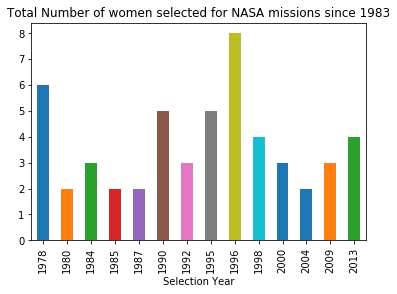

In [7]:
total_women_astronauts = women_asts.groupby('Group').size()

total_women_astronauts.index = women_asts.groupby('Group')['Selection Year'].min()
total_women_astronauts.name = 'Women Astronauts'
total_women_astronauts[2013] = 4

total_women_astronauts.plot(kind= 'bar', title= 'Total Number of women selected for NASA missions since 1983');

From the data we can see that in 1996, there were more women selected for NASA missions and the number has reduced since then. 


#### Percentage of women in NASA

We can also measure the percentage of women selected for missions in NASA simply by dividing the total number of persons selected. Again, we refer to NASA women in space and Astronaut Biographies to fill in the values for the most recent selections.


In [8]:
selected = astronauts[astronauts['Group'] > 7]
percentage_women_asts = women_asts.groupby('Group').size() / selected.groupby('Group').size()
percentage_women_asts.index = women_asts.groupby('Group')['Selection Year'].min()
percentage_women_asts[2013] = 4/8
percentage_women_asts = percentage_women_asts*100

percentage_women_asts

#percentage_women_asts.columns = ['Women Astronauts', 'Year']
#percentage_women_asts.plot(kind= 'bar', title= 'Percentage of women selected for NASA missions since 1983', x= 'Year');

Selection Year
1978    17.142857
1980    10.526316
1984    17.647059
1985    15.384615
1987    13.333333
1990    21.739130
1992    15.789474
1995    26.315789
1996    22.857143
1998    16.000000
2000    17.647059
2004    18.181818
2009    21.428571
2013    50.000000
dtype: float64

We already saw before that in 1996, there were 8 women selected to join NASA as astronauts. However, from the data above, we can see this was about 20-25% of the total number of people selected to join NASA as astronauts therefore this solidifies our point from before that the number of people selected as astronauts greatly varies per group.

In 2013, there was a gender balance achieved finally, when half the members of the 21st group were women.

### 2.3 Measuring the increasing rate of women astronauts in NASA 1978-2013

The number of women astronauts selected for NASA missions has not been constantly rising or falling since for every group, a different number of astronauts are selected for future missions. We will attempt to perform a linear regression analysis to calculate the rate at which the percentage of women astronauts from 2000 to 2013 is increasing.

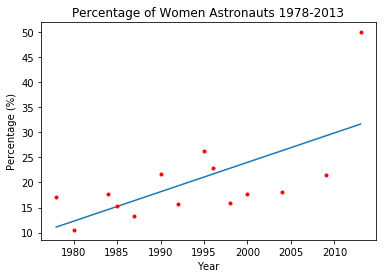

In [9]:
X = np.array([np.ones(14), percentage_women_asts.loc[1978:].index.values])
X = np.matrix(X).T
Y = percentage_women_asts.loc[1978:].values
Y = np.matrix(Y).T

A = (X.T * X)**(-1) * X.T * Y

x = percentage_women_asts.loc[1978:].index.values
y = A[0,0] + A[1,0]*x

plt.plot(x,y,X[:,1],Y,'r.')
plt.xlabel('Year'), plt.ylabel('Percentage (%)')
plt.title('Percentage of Women Astronauts 1978-2013')
plt.show();




The percentage of women astronauts is increasing at 0.58%/year. We can see how widely distributed the data is therefore this figure could be abit misleading. We are however going to assume that it is accurate for now

In [10]:
increase_women_per_year = A[1,0]
increase_women_per_year

0.5876675804665926

### 2.4 Projecting Gender Balance in NASA Astronaut Selections

We have calculated the rate at which the percentage of women astronauts is increasing and so the final step is to use this rate to predict when NASA astronaut selectionwill achieve gender balance. We calculate:

( Women Astronauts in 2013, % ) + ( Increase of Women Astronauts, %/year ) * ( Number of Years ) = 50%

 => Number of Years = ( 50% - ( Women Astronauts in 2013, % ) ) / ( Increase of Women Astronauts, %/year )

In [11]:
(50 - percentage_women_asts[2013])/ increase_women_per_year

0.0

At the current rate, we can see that the gender balance has been achieved! Hopefully this will be case in future selections.

SyntaxError: invalid syntax (<ipython-input-12-d6117faed17b>, line 1)